# Networks

**COMPAS** networks are simple edge graphs: they consist of vertices connected by edges.
Not all vertices have to be connected by edges.
A network without edges is a valid network.
In fact, even a network without vertices and edges is a valid network, albeit a quite pointless one.

Edges have a direction. There can only be one edge between two vertices in a particular direction.
However, there can be two edges between two vertices in opposite direction.
Vertices can be connected to themseleves.

##  Making a network

In [247]:
import compas
from compas.datastructures import Network

network = Network()

## Adding vertices and edges

In [248]:
a = network.add_vertex()
b = network.add_vertex(x=1.0)
c = network.add_vertex(y=1.0)
d = network.add_vertex(x=-1.0)
e = network.add_vertex(y=-1.0)

In [249]:
network.add_edge(a, b)
network.add_edge(a, c)
network.add_edge(a, d)
network.add_edge(a, e)

(0, 4)

## Identifiers

All vertices in a network have a unique id, the *key* of the vertex. By default, keys are integers, and every vertex is assigned a number corresponding to the order in which they are added. The number is always the highest number used so far, plus one.

Other types keys may be specified as well, as long as their value is *hashable*.

In [250]:
print(a, type(a))

0 <class 'int'>


In [251]:
b == a + 1

True

In [252]:
f = network.add_vertex(key=7)
f == e + 1

False

In [253]:
g = network.add_vertex()
g == f + 1

True

In [254]:
network.add_vertex(key='compas')

'compas'

In [255]:
network.add_vertex()

9

## Data

### Iteration

In [256]:
network.vertices()

In [257]:
network.edges()

<generator object Network.edges at 0x61560f678>

In [258]:
for key in network.vertices():
    print(key)

0
1
2
3
4
7
8
compas
9


In [259]:
for u, v in network.edges():
    print(u, v)

0 1
0 2
0 3
0 4


### Lists

In [260]:
list(network.vertices())

[0, 1, 2, 3, 4, 7, 8, 'compas', 9]

In [261]:
list(network.edges())

[(0, 1), (0, 2), (0, 3), (0, 4)]

### Filtering

In [262]:
network.vertices_where({'x': 0.0})

<generator object VertexFilter.vertices_where at 0x61560f468>

## Attributes

All vertices and edges automatically have the default attributes. The default vertex attributes are xyz coordinates, with ``x=0``, ``y=0`` and ``z=0``. Edges have no defaults.

To change the default attributes associated with vertices and edges, do:

In [263]:
network.update_default_vertex_attributes({'z': 10}, is_fixed=False)

# or network.update_default_vertex_attributes(z=10, is_fixed=False)

In [264]:
network.update_default_edge_attributes({'weight': 0.0})

# or network.update_default_edge_attributes(weight=0.0)

**Note**

Other attributes then the ones specified in the defaults can also be added. However, these attributes then only exist on the vertices or edges where they have been specified. To prevent this and only allow the registered attributes to be added, set ``Network.strict_attributes = True``.

When a vertex or edge is added to the network, the default attributes are copied and the values of the specified attributes are modified. To only store the modified values, set ``Network.copy_defaults = False``.

### Getting attributes

In [265]:
network.get_vertex_attribute(a, 'is_fixed')

False

In [266]:
network.get_vertices_attribute('x')

[0.0, 1.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [267]:
network.get_vertices_attributes('xyz')

[[0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0],
 [-1.0, 0.0, 0.0],
 [0.0, -1.0, 0.0],
 [0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0]]

### Setting attributes

In [268]:
network.set_vertex_attribute(a, 'is_fixed', True)

In [269]:
network.set_vertices_attribute('is_fixed', True)

In [270]:
network.set_vertices_attributes(('z', 'is_fixed'), (3, False))

## Using constructors

In [271]:
# network = Network.from_data(data)
# network = Network.from_lines([([], []), ([], [])])
# network = Network.from_json('network.json')
# network = Network.from_pickle('network.pickle')

network = Network.from_obj(compas.get('lines.obj'))

## Queries

under construction...

## Visualisation

To create a 2D representation of a network, use a plotter.

In [272]:
from compas.plotters import NetworkPlotter

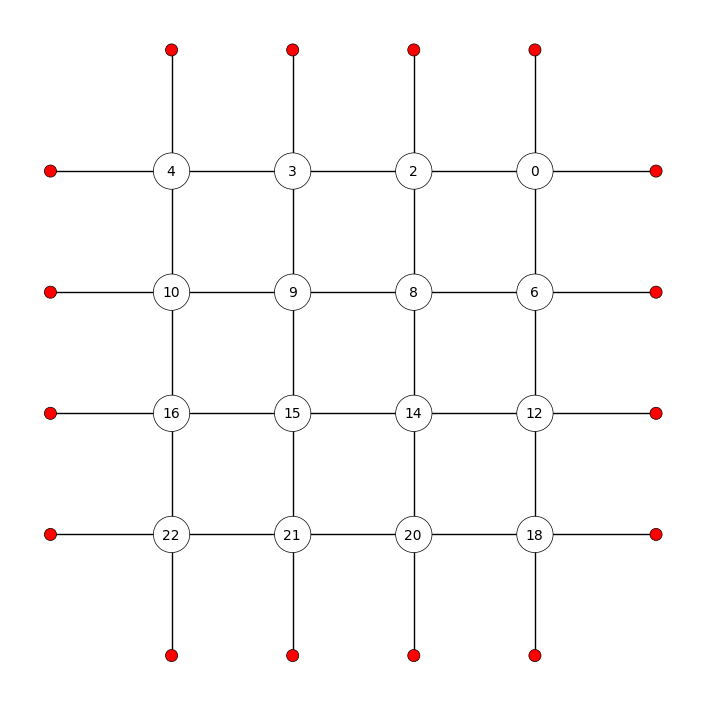

In [273]:
plotter = NetworkPlotter(network, figsize=(16, 9))
plotter.draw_vertices(
    facecolor={key: '#ff0000' for key in network.vertices_where({'vertex_degree': 1})},
    text={key: str(key) for key in network.vertices_where({'vertex_degree': 4})},
    radius={key: 0.3 for key in network.vertices_where({'vertex_degree': 4})}
)
plotter.draw_edges()
plotter.show()